## Title: Loan Approval Prediction using Machine Learning


The objective of this project is to build a predictive machine learning model that can classify whether a loan application will be approved or rejected based on various applicant attributes. The dataset used for this purpose is taken from Kaggle's "Loan Prediction Problem".


## 1. Importing Required Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Importing Libraries and Loading Dataset
We begin by importing necessary libraries such as pandas, numpy, matplotlib, seaborn, and machine learning tools from scikit-learn. Then, we load the dataset from the provided folder and remove irrelevant columns (like Loan_ID) if present.

## 2. Loading the Dataset

In [30]:
df = pd.read_csv("loan approval prediction/train.csv")

We load the dataset using pandas. The file is expected to be located inside a folder named "loan approval prediction". It contains information about loan applicants and whether their loan was approved.

## 3.Dropping Irrelevant Columns

In [34]:
if 'Loan_ID' in df.columns:
    df.drop(columns=['Loan_ID'], inplace=True)

Loan_ID is a unique identifier for each record. It has no predictive value, so we remove it to clean our dataset.

## 4. Handling Missing Values

In [35]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

We fill missing values:

Categorical columns with their most frequent value (mode)

LoanAmount with its median value
This ensures there are no null values that can affect model performance.



## 5. Visualizing the Dataset

In [36]:
plt.figure(figsize=(16, 14))

<Figure size 1600x1400 with 0 Axes>

<Figure size 1600x1400 with 0 Axes>

<ipython-input-37-ac037a0123c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='pastel')


Text(0, 0.5, 'Count')

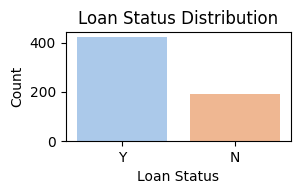

In [37]:
plt.subplot(3, 2, 1)
sns.countplot(x='Loan_Status', data=df, palette='pastel')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")

Text(0.5, 1.0, 'Applicant Income Distribution')

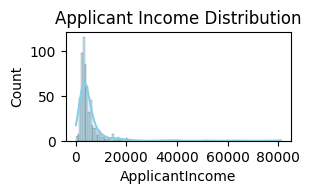

In [38]:
plt.subplot(3, 2, 2)
sns.histplot(df['ApplicantIncome'], kde=True, color='skyblue')
plt.title("Applicant Income Distribution")

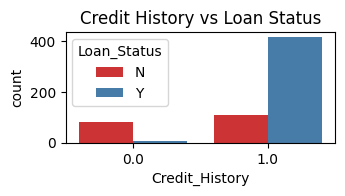

In [39]:
plt.subplot(3, 2, 5)
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='Set1')
plt.title("Credit History vs Loan Status")

plt.tight_layout()
plt.show()

We create five different plots to understand the distribution and relationships between features:

Loan Status Count: Shows how many loans were approved/rejected.

Income Distribution: To see income variations among applicants.

Loan Amount vs Status: To examine if loan size affects approval.

Education vs Loan Status: To observe if education level impacts approval.

Credit History vs Loan Status: One of the most critical factors for approval.

## 6. Encoding Categorical Variables

In [40]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

Machine learning models work with numeric data, so we convert categorical columns into numbers using LabelEncoder.

## 7. Preparing Features and Target Variable

In [41]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


We separate:

Features (X): All columns except the target

Target (y): The Loan_Status column, which we aim to predict

## 8. Splitting Data into Training and Testing Sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We split the data into 80% training and 20% testing. This helps us train the model and then evaluate how well it performs on unseen data.

## 9. Training a Random Forest Classifier

In [43]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

We use the RandomForestClassifier — a powerful ensemble method that combines multiple decision trees for accurate classification. It also gives us feature importance.

## 10. Predicting and Evaluating the Model

In [44]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy:.2f}")


 Model Accuracy: 0.76


We make predictions on the test set and calculate accuracy, which shows how many predictions were correct.

## 11. Feature Importance Visualization

In [45]:
importances = model.feature_importances_
features = X.columns


This chart shows which features had the most influence on the loan approval prediction. Features like Credit_History, ApplicantIncome, and LoanAmount usually have high importance.

## 12. Predicting a New Sample Input

<ipython-input-46-23a831bf4463>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


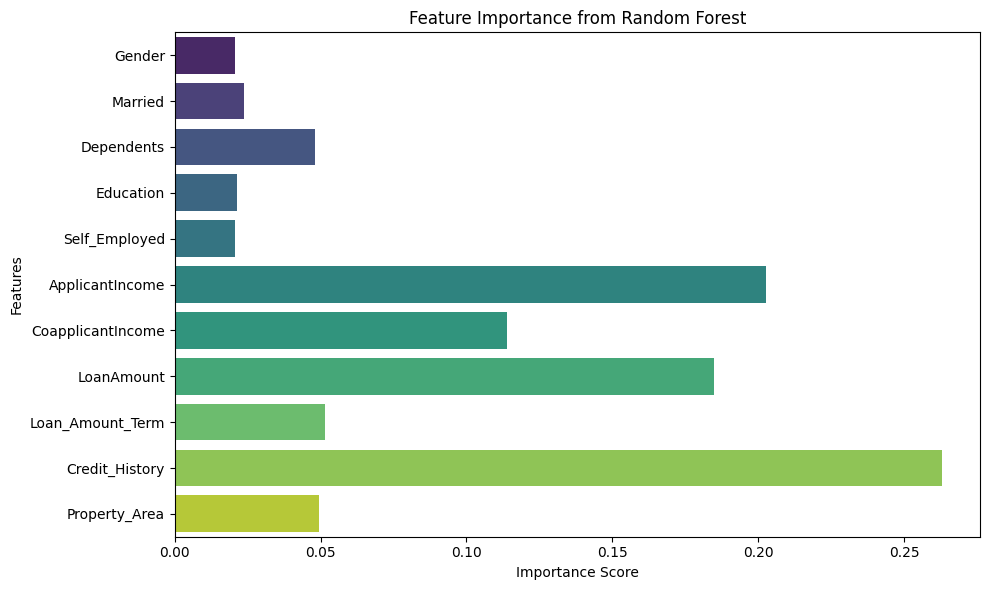

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [47]:
sample = pd.DataFrame([{
    'Gender': 1,
    'Married': 1,
    'Dependents': 0,
    'Education': 0,
    'Self_Employed': 0,
    'ApplicantIncome': 6000,
    'CoapplicantIncome': 1500,
    'LoanAmount': 160,
    'Loan_Amount_Term': 360.0,
    'Credit_History': 1.0,
    'Property_Area': 2
}])

In [48]:
prediction = model.predict(sample)[0]
result = "Approved " if prediction == 1 else "Rejected "
print(" Loan Approval Prediction for Sample Input:", result)

 Loan Approval Prediction for Sample Input: Approved 


We create a dummy loan application with values similar to real-world inputs. The trained model then predicts whether this applicant’s loan would be approved or rejected.